In [1]:
import numpy as np
import pandas as pd
import data
import matplotlib.pyplot as plt

In [2]:
train_frame,train_labels_frame,test_frame,macro_frame=data.loadFrame()

# DataFiled


price_doc: sale price (this is the target variable)

id: transaction id

timestamp: date of transaction

full_sq: total area in square meters, including loggias, balconies and other non-residential areas

life_sq: living area in square meters, excluding loggias, balconies and other non-residential areas

floor: for apartments, floor of the building

max_floor: number of floors in the building

material: wall material

build_year: year built

num_room: number of living rooms

kitch_sq: kitchen area

state: apartment condition

product_type: owner-occupier purchase or investment

sub_area: name of the district

The dataset also includes a collection of features about each property's surrounding neighbourhood, and some features that are constant across each sub area (known as a Raion). Most of the feature names are self explanatory, with the following notes.

full_all: subarea population

male_f, female_f: subarea population by gender

young_*: population younger than working age

work_*: working-age population

ekder_*: retirement-age population

n_m_{all|male|female}: population between n and m years old

build_count_*: buildings in the subarea by construction type or year

x_count_500: the number of x within 500m of the property

x_part_500: the share of x within 500m of the property

_sqm_: square meters

cafe_count_d_price_p: number of cafes within d meters of the property that have an average bill under p RUB

trc_: shopping malls

prom_: industrial zones

green_: green zones

metro_: subway

_avto_: distances by car

mkad_: Moscow Circle Auto Road

ttk_: Third Transport Ring

sadovoe_: Garden Ring

bulvar_ring_: Boulevard Ring

kremlin_: City center

zd_vokzaly_: Train station

oil_chemistry_: Dirty industry

ts_: Power plant

# train_frame

In [3]:
#train_frame's data
train_frame.head(20)

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
id,,,,,,,,,,,,,,,,,,,,,
1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,40,9,4,0,13,22,1,0,52,4
2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,36,15,3,0,15,29,1,10,66,14
3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,25,10,3,0,11,27,0,4,67,10
4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15,11,2,1,4,4,0,0,26,3
5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,552,319,108,17,135,236,2,91,195,14
6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,155,62,14,1,53,78,1,20,113,17
7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,144,81,16,3,38,80,1,27,127,8
8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,36,9,4,0,11,18,1,0,47,4
9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,69,19,8,1,18,34,1,3,85,11


In [4]:
train_frame.shape

(30471, 290)

# train_labels_frame

In [5]:
train_labels_frame.shape

(30471,)

In [6]:
train_labels_frame.head()

id
1     5850000
2     6000000
3     5700000
4    13100000
5    16331452
Name: price_doc, dtype: int64

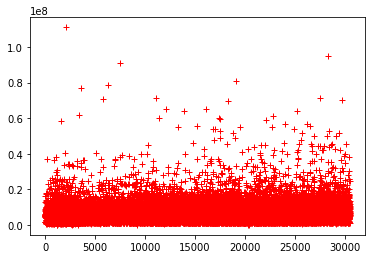

In [7]:
%matplotlib inline
#the price distribution
plt.plot(train_labels_frame.index,train_labels_frame.values,"r+")

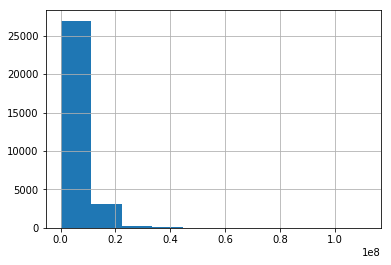

In [8]:
train_labels_frame.hist()

# test_frame

In [9]:
test_frame.head(20)

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
id,,,,,,,,,,,,,,,,,,,,,
30474,2015-07-01,39.00,20.70,2,9,1,1998.0,1,8.9,3.0,...,8,0,0,0,1,10,1,0,14,1
30475,2015-07-01,79.20,NaN,8,17,1,0.0,3,1.0,1.0,...,4,1,1,0,2,11,0,1,12,1
30476,2015-07-01,40.50,25.10,3,5,2,1960.0,2,4.8,2.0,...,42,11,4,0,10,21,0,10,71,11
30477,2015-07-01,62.80,36.00,17,17,1,2016.0,2,62.8,3.0,...,1,1,2,0,0,10,0,0,2,0
30478,2015-07-01,40.00,40.00,17,17,1,0.0,1,1.0,1.0,...,5,1,1,0,2,12,0,1,11,1
30479,2015-07-01,48.43,NaN,21,1,1,2015.0,1,1.0,1.0,...,143,99,57,12,23,42,1,13,123,7
30480,2015-07-01,38.80,NaN,15,17,1,NaN,1,1.0,1.0,...,12,7,2,0,5,14,0,3,17,2
30481,2015-07-01,43.10,NaN,5,0,1,NaN,1,0.0,NaN,...,5,2,2,0,3,12,0,0,6,3
30482,2015-07-01,45.40,28.50,9,12,5,1972.0,2,6.0,2.0,...,3,1,0,0,1,7,0,0,7,0


In [10]:
test_frame.shape

(7662, 290)

# macro_frame

In [11]:
macro_frame.head(40)

,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
timestamp,,,,,,,,,,,,,,,,,,,,,
2010-01-01,76.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2010-01-02,76.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2010-01-03,76.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2010-01-04,76.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9050,43.4054,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2010-01-05,76.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.8360,42.9600,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2010-01-06,76.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.7150,42.9138,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2010-01-07,76.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.7750,42.7143,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2010-01-08,76.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.7750,42.9359,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2010-01-09,76.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.7750,42.9359,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


In [12]:
macro_frame.shape

(2484, 99)

In [13]:
type(macro_frame)

pandas.core.frame.DataFrame

In [14]:
type(macro_frame.index)

pandas.tseries.index.DatetimeIndex

In [15]:
type(macro_frame.index[0])

pandas.tslib.Timestamp

# macro_frame visulization

In [16]:
%matplotlib inline

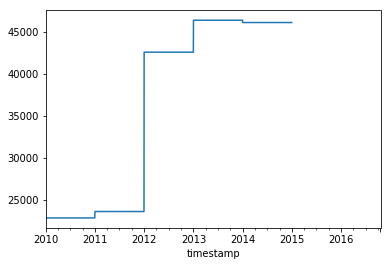

In [17]:
macro_frame["apartment_build"].plot()

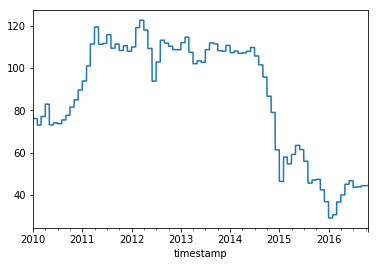

In [18]:
macro_frame["oil_urals"].plot()

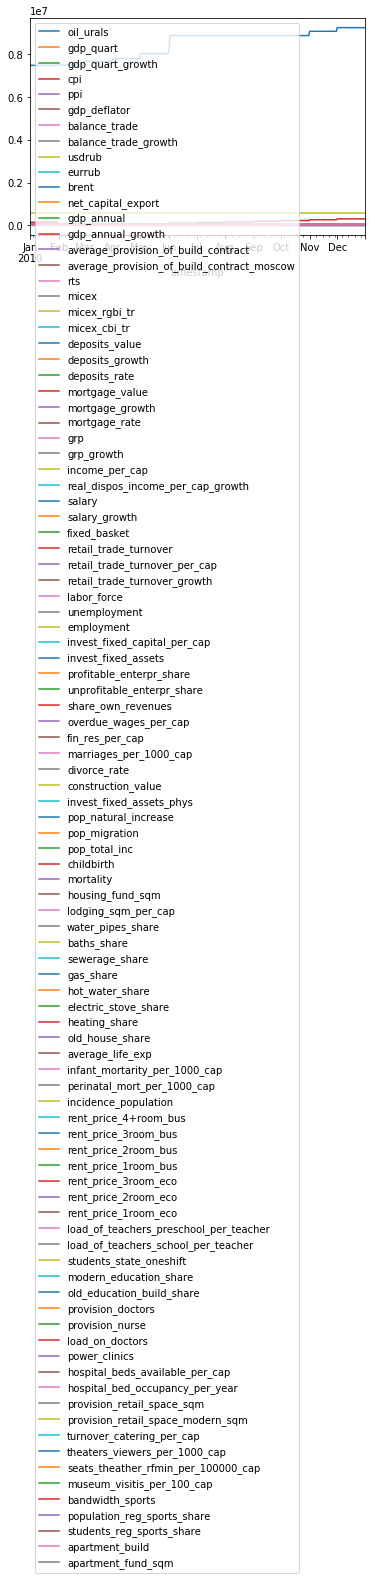

In [19]:
macro_frame.ix["2010"].plot()